In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import re
%matplotlib notebook

In [2]:
column_names = ['test_id','text_length','pattern_length',
                'comparisons','wall_clock_time','cpu_time','optimization']
ss_output = pd.DataFrame(columns = column_names)
print(ss_output.columns)

Index(['test_id', 'text_length', 'pattern_length', 'comparisons',
       'wall_clock_time', 'cpu_time', 'optimization'],
      dtype='object')


In [3]:
#output = open('assignment1/Assignment1a-dir/outputs/searching_sequential.out', 'r')
count = 0
with open('../outputs/searching_sequential.out', 'r') as output:
    line=output.readline()
    while line != '':
        line = output.readline()
        #find start of test result
        if (line.find('Read') >= 0):
            count = count + 1
            test_no = int(re.findall('\d+',line)[0])
            line = output.readline()
            text_len = int(re.findall('\d+', line)[0])
            line = output.readline()
            patt_len = int(re.findall('\d+', line)[0])
            # skip next line which has result of search
            line = output.readline()
            line = output.readline()
            
            comparisons = int(re.findall('\d+', line)[0])
            line = output.readline()
            line = output.readline()
            wall_time = int(re.findall('\d+', line)[1])
            line = output.readline()
            cpu_time = float(re.findall('\d+\.\d+', line)[0])
            line = output.readline()
            
            if (count <= 20):
                optim = 'O2'
            else:
                optim = 'O0'
            
            new_row = {'test_id' : test_no, 'text_length' : text_len,
                      'pattern_length' : patt_len, 'comparisons' : comparisons,
                      'wall_clock_time' : wall_time, 
                       'cpu_time' : cpu_time,
                      'optimization': optim}
            ss_output = ss_output.append(new_row, ignore_index=True)
            
            

# for line in output:

#output.close()

In [4]:
ss_output.head()

,test_id,text_length,pattern_length,comparisons,wall_clock_time,cpu_time,optimization
0,0,10,10,10,0,9.800000e-07,O2
1,1,20,5,80,0,7.730000e-07,O2
2,2,50,2,98,0,8.010000e-07,O2
3,3,100,1,100,0,8.610000e-07,O2
4,4,100,100,100,0,7.540000e-07,O2


In [5]:
ss_output['product'] = ss_output['text_length'] * ss_output['pattern_length']
ss_output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   test_id          40 non-null     object 
 1   text_length      40 non-null     object 
 2   pattern_length   40 non-null     object 
 3   comparisons      40 non-null     object 
 4   wall_clock_time  40 non-null     object 
 5   cpu_time         40 non-null     float64
 6   optimization     40 non-null     object 
 7   product          40 non-null     object 
dtypes: float64(1), object(7)
memory usage: 2.6+ KB


<IPython.core.display.Javascript object>


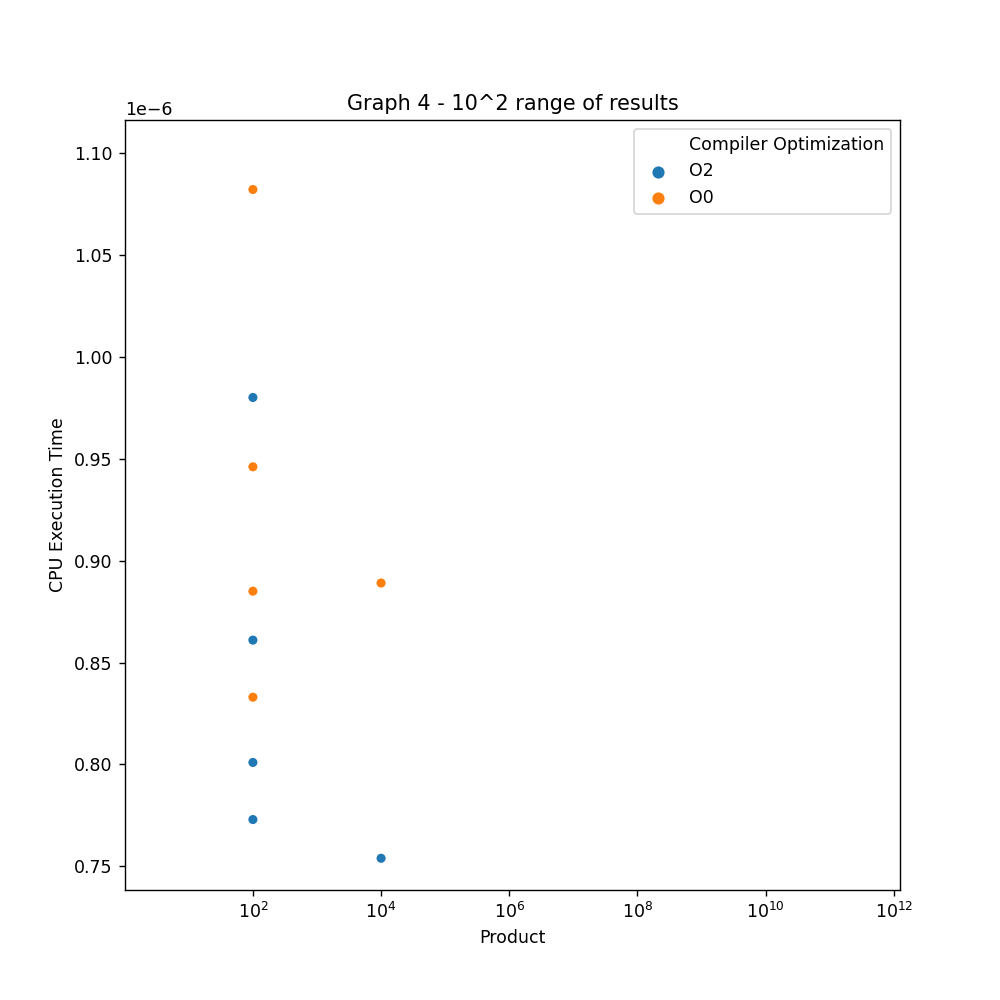

[None, Text(0.5, 1.0, 'Graph 4 - 10^2 range of results')]

In [55]:
x = 10 ** np.arange(2,10,2)
f, ax = plt.subplots(figsize=(8,8))

g=sns.scatterplot(x=ss_output['product'],
                  y=ss_output['cpu_time'],
                  hue=ss_output['optimization'])

ax.legend().texts[0].set_text('Compiler Optimization')
ax.set_xlabel('Product')
ax.set_ylabel('CPU Execution Time')
ax.set(title='Graph 4 - 10^2 range of results', xscale='log')


In [56]:
plt.savefig('../img/ten_2.png')
#ss_output.to_csv('searching_sequential_out.csv',index=False,header=True)

In [28]:
savefig('ten_2_results.png')

NameError: name 'savefig' is not defined

<IPython.core.display.Javascript object>


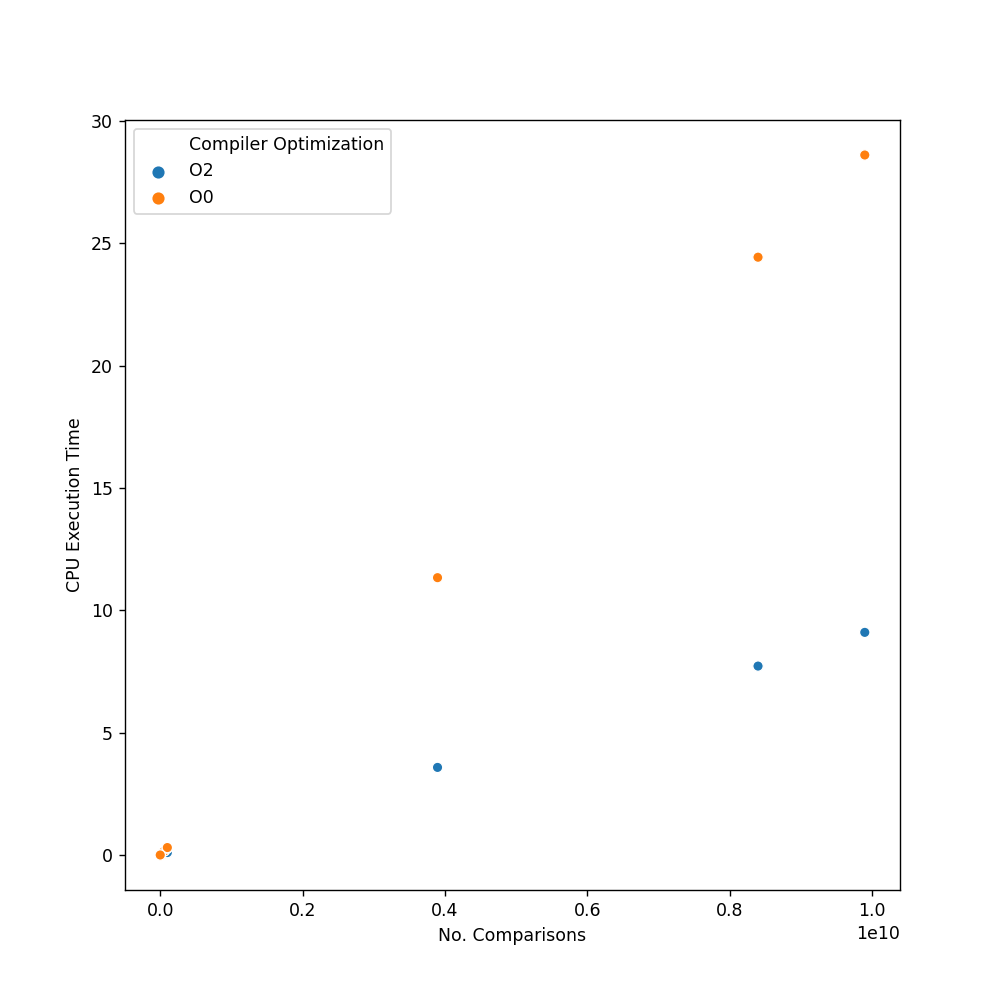

In [35]:
f, ax = plt.subplots(figsize=(8,8))


#ax.set_xticklabels(ss_output['product'].unique())
g=sns.scatterplot(x=ss_output['comparisons'],
                  y=ss_output['cpu_time'],
                  hue=ss_output['optimization'])
#g.legend().texts[0].set_text('')
#g.legend().set_title('Compiler Optimization')
ax.legend().texts[0].set_text('Compiler Optimization')
ax.set_xlabel('No. Comparisons')
ax.set_ylabel('CPU Execution Time')
plt.savefig('comparisons_time.png')
#ax.set(xscale='log')

In [26]:
ss_output[ss_output['optimization']=='O2']

,test_id,text_length,pattern_length,comparisons,wall_clock_time,cpu_time,optimization,product
0,0,10,10,10,0,9.800000e-07,O2,100
1,1,20,5,80,0,7.730000e-07,O2,100
2,2,50,2,98,0,8.010000e-07,O2,100
3,3,100,1,100,0,8.610000e-07,O2,100
4,4,100,100,100,0,7.540000e-07,O2,10000
5,5,200,50,7550,0,2.490800e-05,O2,10000
6,6,500,20,9620,0,9.653000e-06,O2,10000
7,7,1000,10,9910,0,9.730000e-06,O2,10000
8,8,1000,1000,1000,0,1.569000e-06,O2,1000000
9,9,1600,625,610000,0,5.966560e-04,O2,1000000
